Random Forest

In [13]:
# Imports
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.datasets import load_diabetes

In [14]:
import pandas as pd

df = pd.read_csv('covid_final.csv')

In [15]:
X = df[['sni_covid19_vaccination','new_persons_vaccinated', 'stringency_index', 'inc_death',
                     'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline',
                     'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']]
y = df['inc_case']

print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (850, 8), y shape: (850,)


In [16]:
from sklearn.model_selection import train_test_split

test_size = 0.2  # Define the percentage of the test size after train-test split
random_state = 42  # Define random seed for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (680, 8), y_train shape: (680,)
X_test shape: (170, 8), y_test shape: (170,)


In [17]:
# TODO: Define an Random Forest object using RandomForestRegressor 
rf_model = RandomForestRegressor()
# TODO: Fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
# Predict on the test data
y_pred = rf_model.predict(X_test)

In [19]:
# TODO: Evaluate the model using MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 12206219341.159357


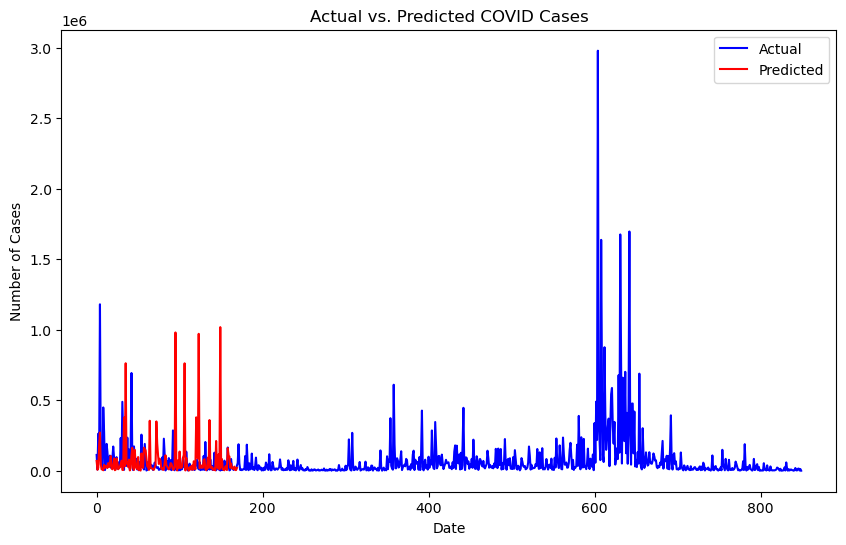

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df.index[:len(y)], y, label='Actual', color='blue')  # Adjusted to match the length of y
plt.plot(df.index[:len(y_pred)], y_pred, label='Predicted', color='red')  # Adjusted to match the length of y_pred
plt.title('Actual vs. Predicted COVID Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

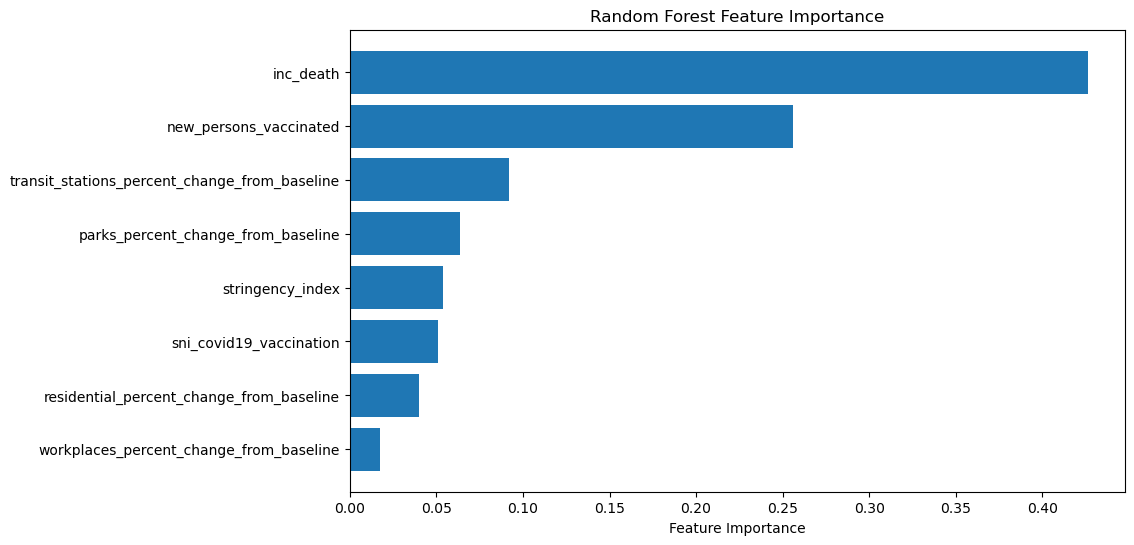

In [21]:
# Get feature importances from the random forest model
feature_importances = rf_model.feature_importances_

# Get the names of features
feature_names = list(X.columns)

# Sort features based on importance
sorted_idx = feature_importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

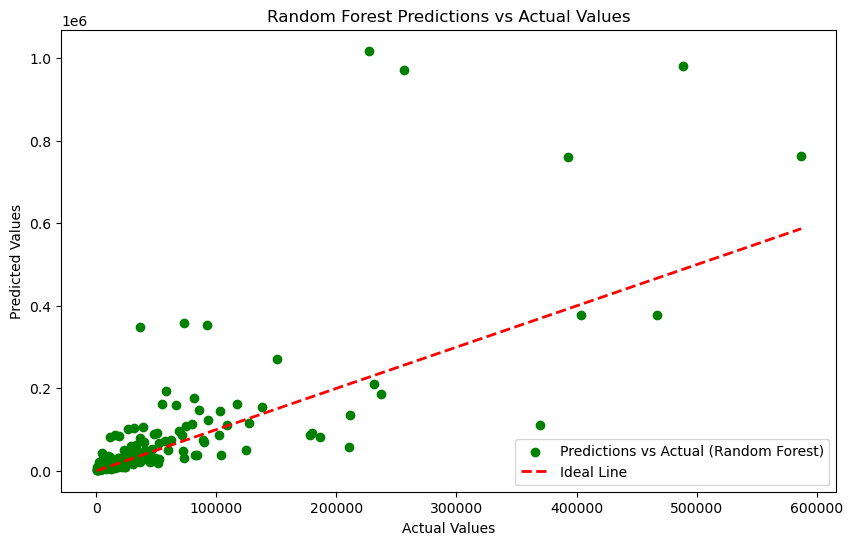

In [22]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Predictions vs Actual (Random Forest)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Random Forest Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

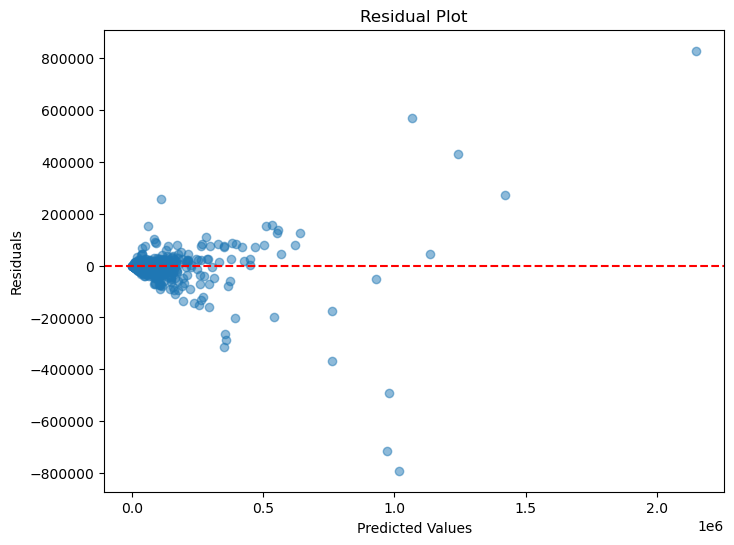

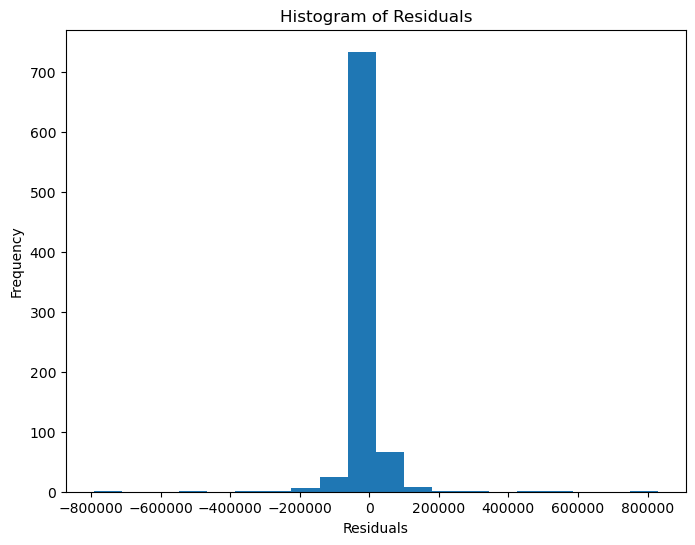

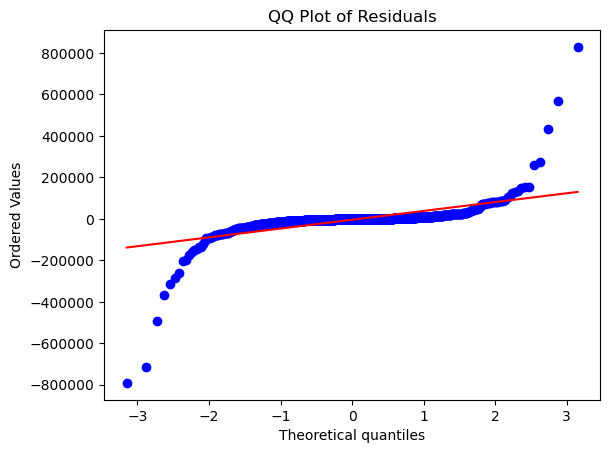

Shapiro-Wilk Test p-value: 0.0


In [23]:
#Calculate Residuals
predicted_values = rf_model.predict(X)
residuals = y - predicted_values

#Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#Histogram of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#QQ Plot
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

#5 Statistical Tests
normality_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test p-value:", normality_test.pvalue)


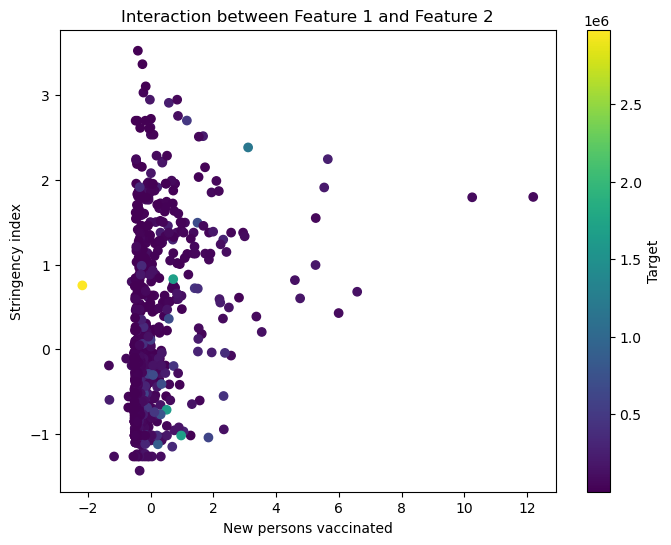

RandomForestRegressor()

In [24]:
import numpy as np
import matplotlib.pyplot as plt


# Example: Plot interaction between feature1 and feature2
plt.figure(figsize=(8, 6))
plt.scatter(df['new_persons_vaccinated'], df['stringency_index'], c=df['inc_case'], cmap='viridis')
plt.xlabel('New persons vaccinated')
plt.ylabel('Stringency index')
plt.title('Interaction between Feature 1 and Feature 2')
plt.colorbar(label='Target')
plt.show()

# Example: Create interaction term between feature1 and feature2
df['interaction_term'] = df['new_persons_vaccinated'] * df['stringency_index']

# Fit Random Forest model with interaction term included
X_with_interaction = df[['new_persons_vaccinated', 'stringency_index', 'interaction_term']]
rf_model.fit(X_with_interaction, y)
